### About the Dataset

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

You are required to help the manager to predict the right group of the new customers.


In [18]:
data_description = pd.read_csv("data_description.csv")
data_description

,Variable,Definition
0,ID,Unique ID
1,Gender,Gender of the customer
2,Ever_Married,Marital status of the customer
3,Age,Age of the customer
4,Graduated,Is the customer a graduate?
5,Profession,Profession of the customer
6,Work_Experience,Work Experience in years
7,Spending_Score,Spending score of the customer
8,Family_Size,Number of family members for the customer (inc...
9,Var_1,Anonymised Category for the customer


In [6]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("classification_dataset.zip", 'r') as zip_obj:

    # Extracting specific file in the zip
    # into a specific location.
    zip_obj.extractall( path="./classification_dataset")


In [7]:
import os

os.listdir("./classification_dataset/")

['classification_dataset', 'Test_LqhgPWU.csv', 'Train_aBjfeNk.csv']

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


train_data = pd.read_csv("./classification_dataset/Train_aBjfeNk.csv")
test_data = pd.read_csv("./classification_dataset/Test_LqhgPWU.csv")


train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [12]:
train_data.describe(include = "all")

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [14]:
train_data.isnull().sum().to_frame(name = "No. of Missing Values")

,No. of Missing Values
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [27]:
train_data[train_data["Ever_Married"].isnull()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
24,461021,Female,NaN,58,No,Executive,1.0,Average,3.0,Cat_3,B
108,466466,Female,NaN,19,No,Healthcare,6.0,Low,5.0,Cat_3,D
201,466065,Male,NaN,19,No,Healthcare,9.0,Low,3.0,Cat_3,D
213,460516,Female,NaN,85,No,Lawyer,0.0,High,1.0,Cat_3,C
272,464841,Male,NaN,19,No,Entertainment,0.0,High,3.0,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...,...
7756,465987,Male,NaN,20,No,Healthcare,1.0,Low,3.0,Cat_2,D
7775,462989,Male,NaN,32,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8011,466026,Female,NaN,49,No,Entertainment,0.0,Low,1.0,Cat_3,A
8030,459082,Male,NaN,45,Yes,Artist,1.0,Low,NaN,Cat_6,A


## Preliminary Analysis

### Drop all missing values

In [29]:
temp_data = train_data.dropna()

In [30]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


### Exploring the Dataset

<AxesSubplot:>

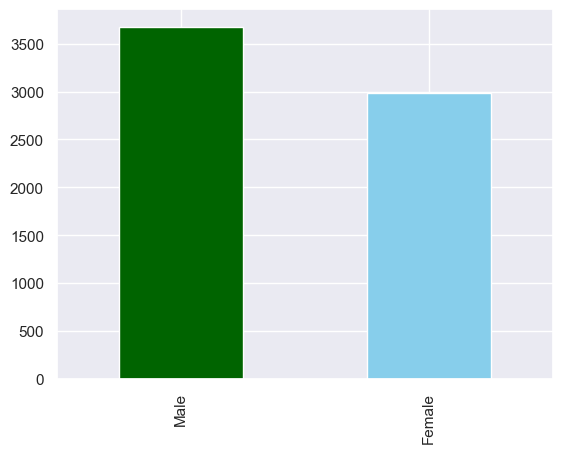

In [36]:
temp_data["Gender"].value_counts().plot(kind = "bar", color = ["darkgreen", "skyblue"])

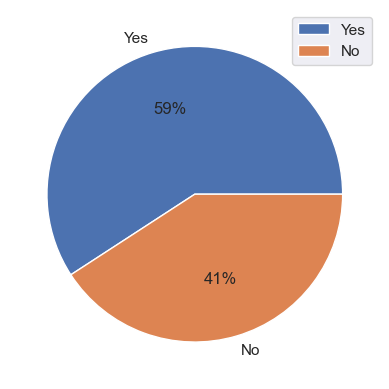

In [45]:
plt.pie(temp_data["Ever_Married"].value_counts(), labels=["Yes", "No"], autopct='%.0f%%')
plt.legend()

<AxesSubplot:xlabel='Age', ylabel='Count'>

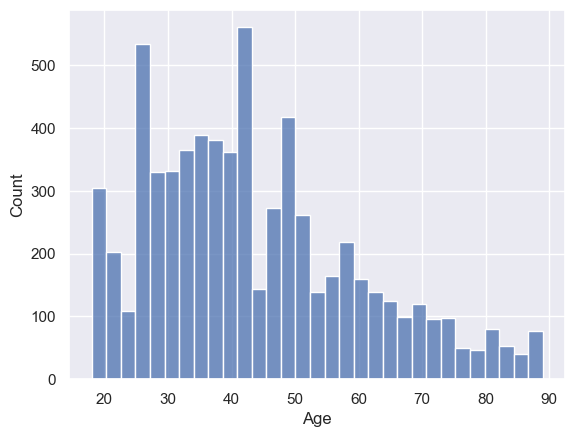

In [47]:
sns.histplot(data = temp_data, x = "Age")

<AxesSubplot:xlabel='Segmentation', ylabel='Age'>

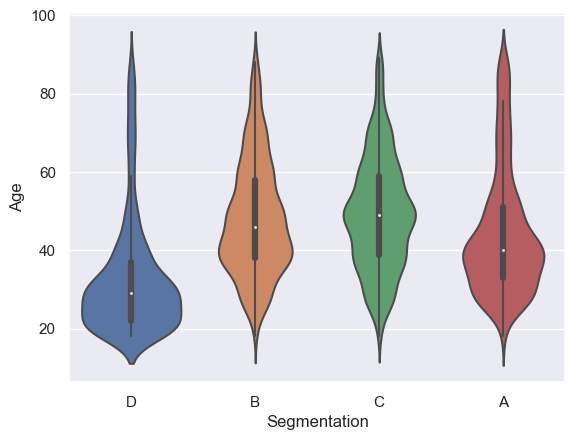

In [50]:
sns.violinplot(data = temp_data, y = "Age", x = "Segmentation")

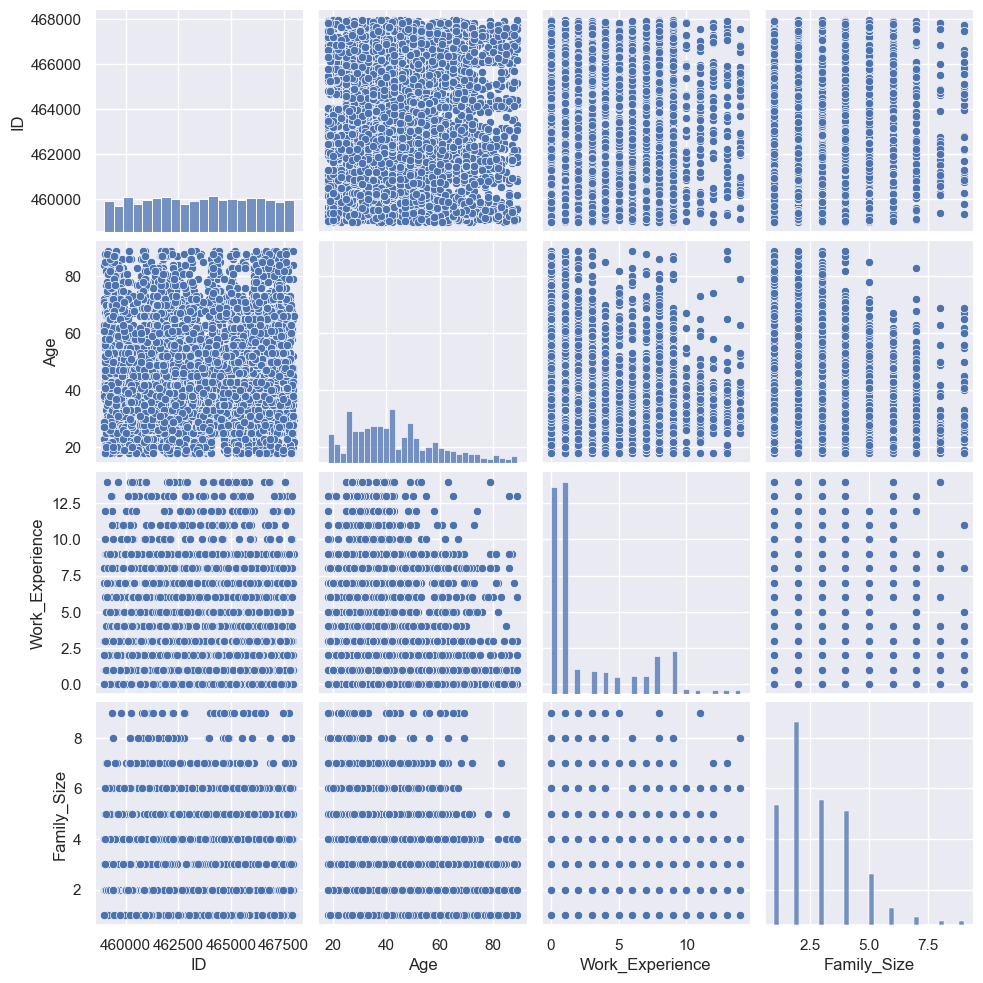

In [51]:
sns.pairplot(temp_data)